<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Project- Tech- Employes Layoffs Prediction and Analysis</center>

**<center>Bigya Bajracharya </center>**
**<center>Sangam Shrestha </center>**

<hr style="border:2px solid lightblue"> </hr>

In [89]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [90]:
dataset = pd.read_csv('LayOffDataset.csv')
dataset.shape

(3000, 26)

In [91]:
# exploring the dataset
dataset.head(10)

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,2019-09-20 00:00:00.000,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,2023-02-11 00:00:00.000,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,2018-12-10 00:00:00.000,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,2021-06-21 00:00:00.000,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,2019-06-29 00:00:00.000,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
5,3432,Maruk,Fraval,2020-01-17 00:00:00.000,NaN,Area Sales Manager,Sheri Campos,maruk.fraval@bilearner.com,BPC,Active,...,Field Operations,03-04-1949,CT,Driver,Male,6050,Black,Married,Fully Meets,3
6,3433,Latia,Costa,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,latia.costa@bilearner.com,WBL,Active,...,General - Eng,01-07-1942,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,3434,Sharlene,Terry,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,sharlene.terry@bilearner.com,CCDR,Active,...,Engineers,07-03-1957,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
8,3435,Jac,McKinzie,2018-08-18 00:00:00.000,NaN,Area Sales Manager,Sharon Becker,jac.mckinzie@bilearner.com,NEL,Active,...,Executive,15-05-1974,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3
9,3436,Joseph,Martins,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,joseph.martins@bilearner.com,BPC,Active,...,Engineers,11-11-1949,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5


In [92]:
dataset.columns

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')

In [93]:
dataset.TerminationType.value_counts()

TerminationType
Unk            1467
Involuntary     388
Voluntary       388
Resignation     380
Retirement      377
Name: count, dtype: int64

In [94]:
dataset.isnull().sum()

EmpID                            0
FirstName                        0
LastName                         0
StartDate                        0
ExitDate                      1467
Title                            0
Supervisor                       0
ADEmail                         18
BusinessUnit                     0
EmployeeStatus                   0
EmployeeType                     0
PayZone                          0
EmployeeClassificationType       0
TerminationType                  0
TerminationDescription        1467
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
GenderCode                       0
LocationCode                     0
RaceDesc                         0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
dtype: int64

In [95]:
dataset.drop(columns=['TerminationDescription','EmpID','ADEmail','FirstName','LastName','DOB'],inplace=True)
dataset.head(10)

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,2019-09-20 00:00:00.000,NaN,Production Technician I,Peter Oneill,CCDR,Active,Contract,Zone C,Temporary,Unk,Production,Finance & Accounting,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,2023-02-11 00:00:00.000,NaN,Production Technician I,Renee Mccormick,EW,Active,Contract,Zone A,Part-Time,Unk,Production,Aerial,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,2018-12-10 00:00:00.000,NaN,Area Sales Manager,Crystal Walker,PL,Active,Full-Time,Zone B,Part-Time,Unk,Sales,General - Sga,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,2021-06-21 00:00:00.000,NaN,Area Sales Manager,Rebekah Wright,CCDR,Active,Contract,Zone A,Full-Time,Unk,Sales,Finance & Accounting,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,2019-06-29 00:00:00.000,NaN,Area Sales Manager,Jason Kim,TNS,Active,Contract,Zone A,Temporary,Unk,Sales,General - Con,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
5,2020-01-17 00:00:00.000,NaN,Area Sales Manager,Sheri Campos,BPC,Active,Contract,Zone B,Full-Time,Unk,Sales,Field Operations,CT,Driver,Male,6050,Black,Married,Fully Meets,3
6,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,Sales,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,Sales,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
8,2018-08-18 00:00:00.000,NaN,Area Sales Manager,Sharon Becker,NEL,Active,Contract,Zone B,Part-Time,Unk,Sales,Executive,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3
9,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,Sales,Engineers,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   3000 non-null   object
 1   ExitDate                    1533 non-null   object
 2   Title                       3000 non-null   object
 3   Supervisor                  3000 non-null   object
 4   BusinessUnit                3000 non-null   object
 5   EmployeeStatus              3000 non-null   object
 6   EmployeeType                3000 non-null   object
 7   PayZone                     3000 non-null   object
 8   EmployeeClassificationType  3000 non-null   object
 9   TerminationType             3000 non-null   object
 10  DepartmentType              3000 non-null   object
 11  Division                    3000 non-null   object
 12  State                       3000 non-null   object
 13  JobFunctionDescription      3000 non-null   obje

In [97]:
# Filter the DataFrame to include only records with non-null ExitDate and involuntary and voluntary terminationType
df_with_exit_date = dataset[dataset['ExitDate'].notnull() & 
    ((dataset['TerminationType'].str.lower() == 'involuntary') | 
     (dataset['TerminationType'].str.lower() == 'voluntary'))]

df_with_exit_date

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
6,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,Sales,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,Sales,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
12,2022-05-25 00:00:00.000,2022-11-27 00:00:00.000,Area Sales Manager,Charles Parks,EW,Active,Full-Time,Zone A,Temporary,Involuntary,Sales,Splicing,CO,Splicer,Male,80820,Other,Single,Fully Meets,3
16,2021-04-05 00:00:00.000,2023-05-12 00:00:00.000,Area Sales Manager,Lauren Jones,WBL,Active,Full-Time,Zone C,Part-Time,Voluntary,IT/IS,Project Management - Con,KY,Coordinator,Male,2621,Asian,Widowed,Fully Meets,3
17,2021-11-28 00:00:00.000,2022-02-04 00:00:00.000,Area Sales Manager,Matthew Jackson,NEL,Active,Contract,Zone A,Part-Time,Voluntary,Sales,Engineers,KY,Director,Male,44553,Other,Widowed,Fully Meets,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2020-01-13 00:00:00.000,2022-10-21 00:00:00.000,Production Technician I,Karen Lin,WBL,Leave of Absence,Contract,Zone B,Full-Time,Voluntary,Production,Field Operations,MA,Engineer,Female,12351,White,Single,Fully Meets,1
2979,2020-03-25 00:00:00.000,2023-04-26 00:00:00.000,Production Technician I,Tina Munoz,NEL,Voluntarily Terminated,Contract,Zone C,Temporary,Involuntary,Production,Finance & Accounting,MA,Administration,Female,24805,Other,Single,Fully Meets,5
2980,2021-04-15 00:00:00.000,2023-05-11 00:00:00.000,Production Technician II,Aaron Stewart,WBL,Active,Part-Time,Zone C,Temporary,Voluntary,Production,Field Operations,MA,Construction Manager,Female,18000,Asian,Single,Fully Meets,5
2993,2020-10-10 00:00:00.000,2022-08-05 00:00:00.000,Production Technician I,Lynn Smith,NEL,Active,Contract,Zone A,Full-Time,Voluntary,Production,Field Operations,MA,Laborer,Female,18079,Other,Married,Fully Meets,2


In [98]:
df_with_exit_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 6 to 2997
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   776 non-null    object
 1   ExitDate                    776 non-null    object
 2   Title                       776 non-null    object
 3   Supervisor                  776 non-null    object
 4   BusinessUnit                776 non-null    object
 5   EmployeeStatus              776 non-null    object
 6   EmployeeType                776 non-null    object
 7   PayZone                     776 non-null    object
 8   EmployeeClassificationType  776 non-null    object
 9   TerminationType             776 non-null    object
 10  DepartmentType              776 non-null    object
 11  Division                    776 non-null    object
 12  State                       776 non-null    object
 13  JobFunctionDescription      776 non-null    object
 14

In [99]:
print(pd.unique(df_with_exit_date.loc[:, 'StartDate']))
print(pd.unique(df_with_exit_date.loc[:, 'ExitDate']))

['2022-04-06 00:00:00.000' '2020-11-06 00:00:00.000'
 '2022-05-25 00:00:00.000' '2021-04-05 00:00:00.000'
 '2021-11-28 00:00:00.000' '2020-05-26 00:00:00.000'
 '2023-05-10 00:00:00.000' '2021-02-18 00:00:00.000'
 '2022-04-28 00:00:00.000' '2018-09-13 00:00:00.000'
 '2018-12-03 00:00:00.000' '2023-06-12 00:00:00.000'
 '2022-08-02 00:00:00.000' '2019-03-07 00:00:00.000'
 '2022-10-31 00:00:00.000' '2023-04-26 00:00:00.000'
 '2018-09-25 00:00:00.000' '2018-11-20 00:00:00.000'
 '2019-08-27 00:00:00.000' '2023-04-17 00:00:00.000'
 '2022-09-02 00:00:00.000' '2021-04-10 00:00:00.000'
 '2020-12-13 00:00:00.000' '2020-01-03 00:00:00.000'
 '2021-06-01 00:00:00.000' '2020-04-06 00:00:00.000'
 '2021-07-31 00:00:00.000' '2023-07-11 00:00:00.000'
 '2019-02-09 00:00:00.000' '2019-04-19 00:00:00.000'
 '2020-03-09 00:00:00.000' '2021-05-18 00:00:00.000'
 '2021-07-21 00:00:00.000' '2020-11-20 00:00:00.000'
 '2021-11-23 00:00:00.000' '2021-10-05 00:00:00.000'
 '2021-04-11 00:00:00.000' '2019-08-01 00:00:0

In [100]:
# Define a function to convert datetime column to seconds
def convert_datetime_to_seconds(df, column_name):
    df.loc[:, column_name] = pd.to_datetime(df[column_name]).astype('int64').div(10**9)

# Convert 'StartDate' and 'ExitDate' columns to seconds
convert_datetime_to_seconds(df_with_exit_date, 'StartDate')
convert_datetime_to_seconds(df_with_exit_date, 'ExitDate')

In [101]:
print(pd.unique(df_with_exit_date.loc[:, 'Title']))
print(pd.unique(df_with_exit_date.loc[:, 'Supervisor']))
print(pd.unique(df_with_exit_date.loc[:, 'BusinessUnit']))
print(pd.unique(df_with_exit_date.loc[:, 'EmployeeStatus']))
print(pd.unique(df_with_exit_date.loc[:, 'EmployeeType']))
print(pd.unique(df_with_exit_date.loc[:, 'PayZone']))
print(pd.unique(df_with_exit_date.loc[:, 'EmployeeClassificationType']))
print(pd.unique(df_with_exit_date.loc[:, 'TerminationType']))
print(pd.unique(df_with_exit_date.loc[:, 'DepartmentType']))
print(pd.unique(df_with_exit_date.loc[:, 'Division']))
print(pd.unique(df_with_exit_date.loc[:, 'State']))
print(pd.unique(df_with_exit_date.loc[:, 'JobFunctionDescription']))
print(pd.unique(df_with_exit_date.loc[:, 'GenderCode']))
print(pd.unique(df_with_exit_date.loc[:, 'RaceDesc']))
print(pd.unique(df_with_exit_date.loc[:, 'MaritalDesc']))
print(pd.unique(df_with_exit_date.loc[:, 'Performance Score']))

['Area Sales Manager' 'Production Technician I' 'Production Technician II'
 'Sr. Network Engineer' 'Network Engineer' 'IT Support'
 'Enterprise Architect' 'Data Analyst' 'Sr. DBA' 'Sr. Accountant'
 'Software Engineer' 'Database Administrator' 'Data Architect' 'CIO'
 'Senior BI Developer' 'Shared Services Manager' 'Production Manager'
 'President & CEO' 'Accountant I' 'Software Engineering Manager'
 'BI Developer' 'Sales Manager' 'BI Director' 'IT Manager - Infra'
 'IT Manager - Support' 'Data Analyst ' 'Director of Operations'
 'IT Manager - DB' 'Director of Sales' 'IT Director'
 'Administrative Assistant']
['Jacob Braun' 'Tracy Marquez' 'Charles Parks' 'Lauren Jones'
 'Matthew Jackson' 'Michelle Evans MD' 'Ashley Reeves' 'Michael Bradshaw'
 'Elizabeth Anderson' 'Brianna Mathews' 'Mark Harris' 'Samantha Cardenas'
 'Madison Wilson' 'Brandon Harris' 'Victoria Krause' 'Peter Harvey'
 'Patrick Daniel' 'Bryan Douglas' 'Jordan Vega' 'Lindsay Chang'
 'Sharon Ruiz' 'Cheryl Henry' 'Teresa Danie

In [102]:
df_with_exit_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 6 to 2997
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   776 non-null    object
 1   ExitDate                    776 non-null    object
 2   Title                       776 non-null    object
 3   Supervisor                  776 non-null    object
 4   BusinessUnit                776 non-null    object
 5   EmployeeStatus              776 non-null    object
 6   EmployeeType                776 non-null    object
 7   PayZone                     776 non-null    object
 8   EmployeeClassificationType  776 non-null    object
 9   TerminationType             776 non-null    object
 10  DepartmentType              776 non-null    object
 11  Division                    776 non-null    object
 12  State                       776 non-null    object
 13  JobFunctionDescription      776 non-null    object
 14

In [103]:
df_with_exit_date['TerminationType'].value_counts()

TerminationType
Involuntary    388
Voluntary      388
Name: count, dtype: int64

In [104]:
df_with_exit_date.TerminationType.replace(['Involuntary', 'Voluntary'], [1,0], inplace=True)

/var/folders/1m/0ybbb7s92fbfcpw8bkrj1zfm0000gn/T/ipykernel_60221/2803306474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_exit_date.TerminationType.replace(['Involuntary', 'Voluntary'], [1,0], inplace=True)


In [105]:
df_with_exit_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 6 to 2997
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   776 non-null    object
 1   ExitDate                    776 non-null    object
 2   Title                       776 non-null    object
 3   Supervisor                  776 non-null    object
 4   BusinessUnit                776 non-null    object
 5   EmployeeStatus              776 non-null    object
 6   EmployeeType                776 non-null    object
 7   PayZone                     776 non-null    object
 8   EmployeeClassificationType  776 non-null    object
 9   TerminationType             776 non-null    int64 
 10  DepartmentType              776 non-null    object
 11  Division                    776 non-null    object
 12  State                       776 non-null    object
 13  JobFunctionDescription      776 non-null    object
 14

In [106]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df_with_exit_date.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_with_exit_date[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_with_exit_date, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
     TerminationType  LocationCode  Current Employee Rating  \
6                1.0       90007.0                      4.0   
7                1.0       97756.0                      2.0   
12               1.0       80820.0                      3.0   
16               0.0        2621.0                      3.0   
17               0.0       44553.0                      3.0   
..               ...           ...                      ...   
769              NaN           NaN                      NaN   
770              NaN           NaN                      NaN   
771              NaN           NaN                      NaN   
772              NaN           NaN                      NaN   
773              NaN           NaN                      NaN   

     StartDate_1533686400.0  StartDate_1533859200.0  StartDate_1533945600.0  \
6                       0.0                     0.0                     0.0   
7                       0.0                     0.0         

In [107]:
df_encoded['TerminationType'].value_counts()

TerminationType
1.0    388
0.0    388
Name: count, dtype: int64

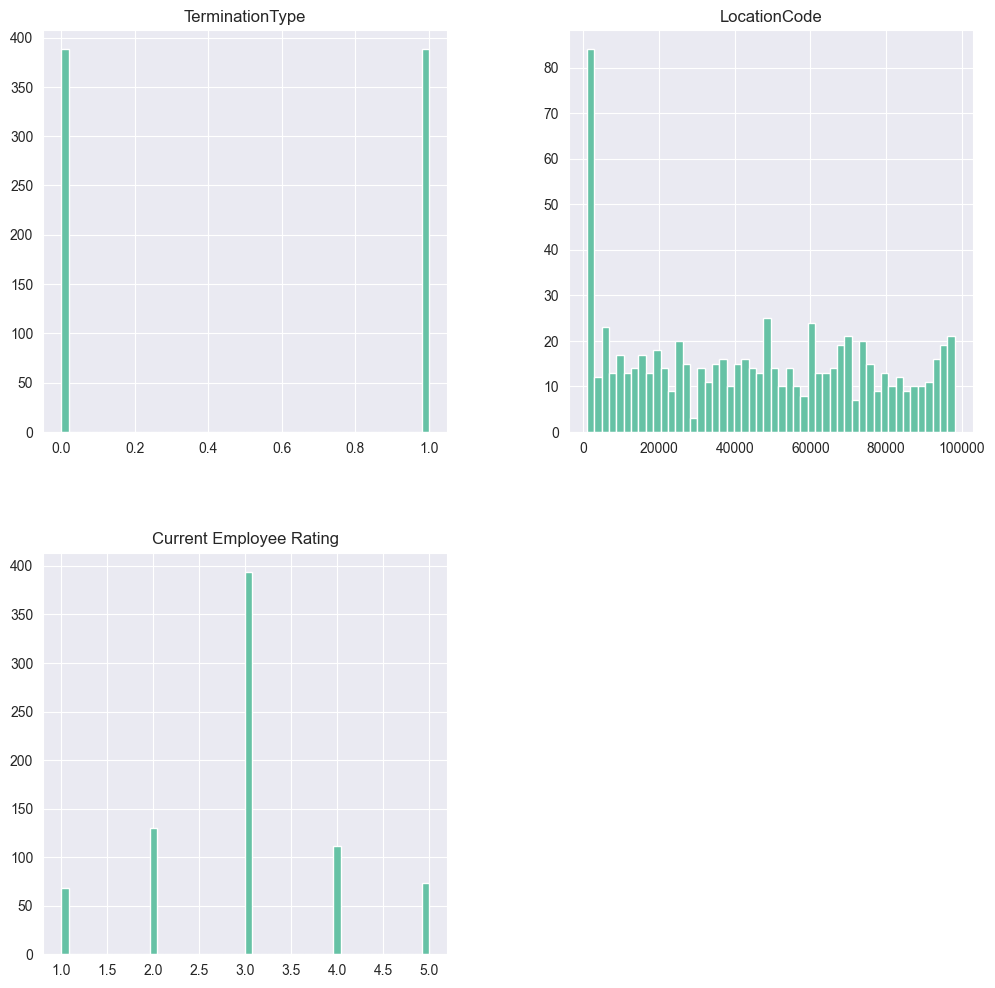

In [108]:
df_with_exit_date.hist(bins=50,figsize=(12,12))
plt.show()

In [109]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1362 entries, 6 to 773
Columns: 2127 entries, TerminationType to Performance Score_PIP
dtypes: float64(2127)
memory usage: 22.1 MB


In [110]:
# Getting independent and dependent variables 
y = df_encoded['TerminationType']
X = df_encoded.drop(['TerminationType'], axis=1)

<div class="alert alert-block alert-info">

# Logistic Regression
    
</div>

In [111]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [113]:
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [114]:
# fitting the logistic regression model to the training data
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [115]:
# predicting the class for the test data
y_pred = logre.predict(X_test)

In [116]:
y_pred

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1.

In [117]:
y_test

1874    0.0
107     0.0
19      0.0
147     1.0
589     1.0
       ... 
385     0.0
1012    0.0
2316    0.0
2603    0.0
405     0.0
Name: TerminationType, Length: 273, dtype: float64

In [118]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6959706959706959


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       200
         1.0       0.44      0.51      0.47        73

    accuracy                           0.70       273
   macro avg       0.62      0.64      0.63       273
weighted avg       0.71      0.70      0.70       273



[[153  47]
 [ 36  37]]


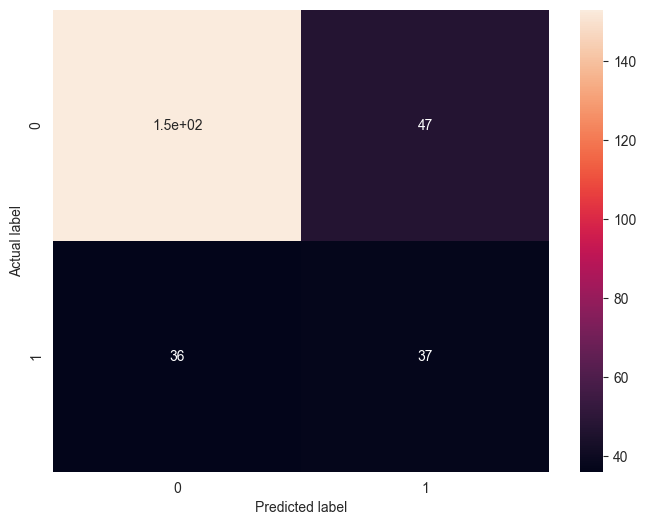

In [120]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

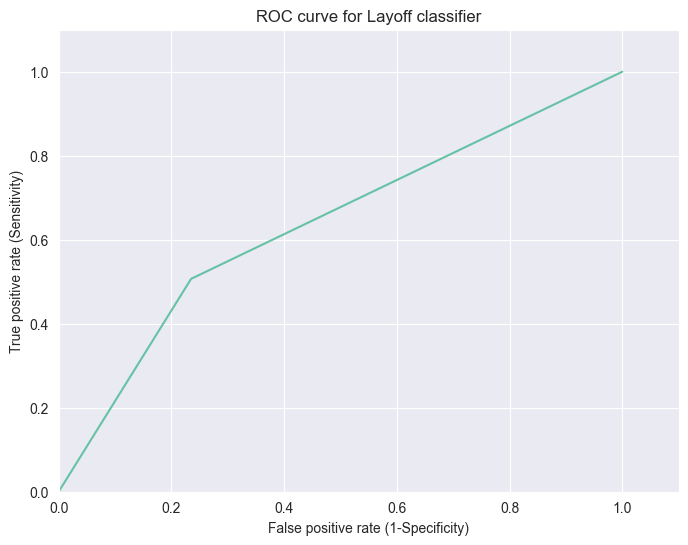

In [121]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.title('ROC curve for Layoff classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [122]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6359246575342465

<div class="alert alert-block alert-info">

# Decision Tress
    
</div>

In [123]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.7154542030340815, 0.9821428571428571, 'LocationCode <= 506.5\ngini = 0.411\nsamples = 1089\nvalue = [774, 315]\nclass = Involuntary'),
 Text(0.7088041614713217, 0.9464285714285714, 'gini = 0.0\nsamples = 467\nvalue = [467, 0]\nclass = Involuntary'),
 Text(0.7221042445968412, 0.9464285714285714, 'PayZone_Zone A <= 0.5\ngini = 0.5\nsamples = 622\nvalue = [307, 315]\nclass = Voluntary'),
 Text(0.47662744181213634, 0.9107142857142857, 'LocationCode <= 21428.0\ngini = 0.5\nsamples = 575\nvalue = [292, 283]\nclass = Involuntary'),
 Text(0.2231920199501247, 0.875, 'DepartmentType_IT/IS <= 0.5\ngini = 0.492\nsamples = 178\nvalue = [78, 100]\nclass = Voluntary'),
 Text(0.21654197838736491, 0.8392857142857143, 'MaritalDesc_Divorced <= 0.5\ngini = 0.496\nsamples = 172\nvalue = [78, 94]\nclass = Voluntary'),
 Text(0.20324189526184538, 0.8035714285714286, 'BusinessUnit_TNS <= 0.5\ngini = 0.498\nsamples = 165\nvalue = [77, 88]\nclass = Voluntary'),
 Text(0.1965918536990856, 0.767857142857142

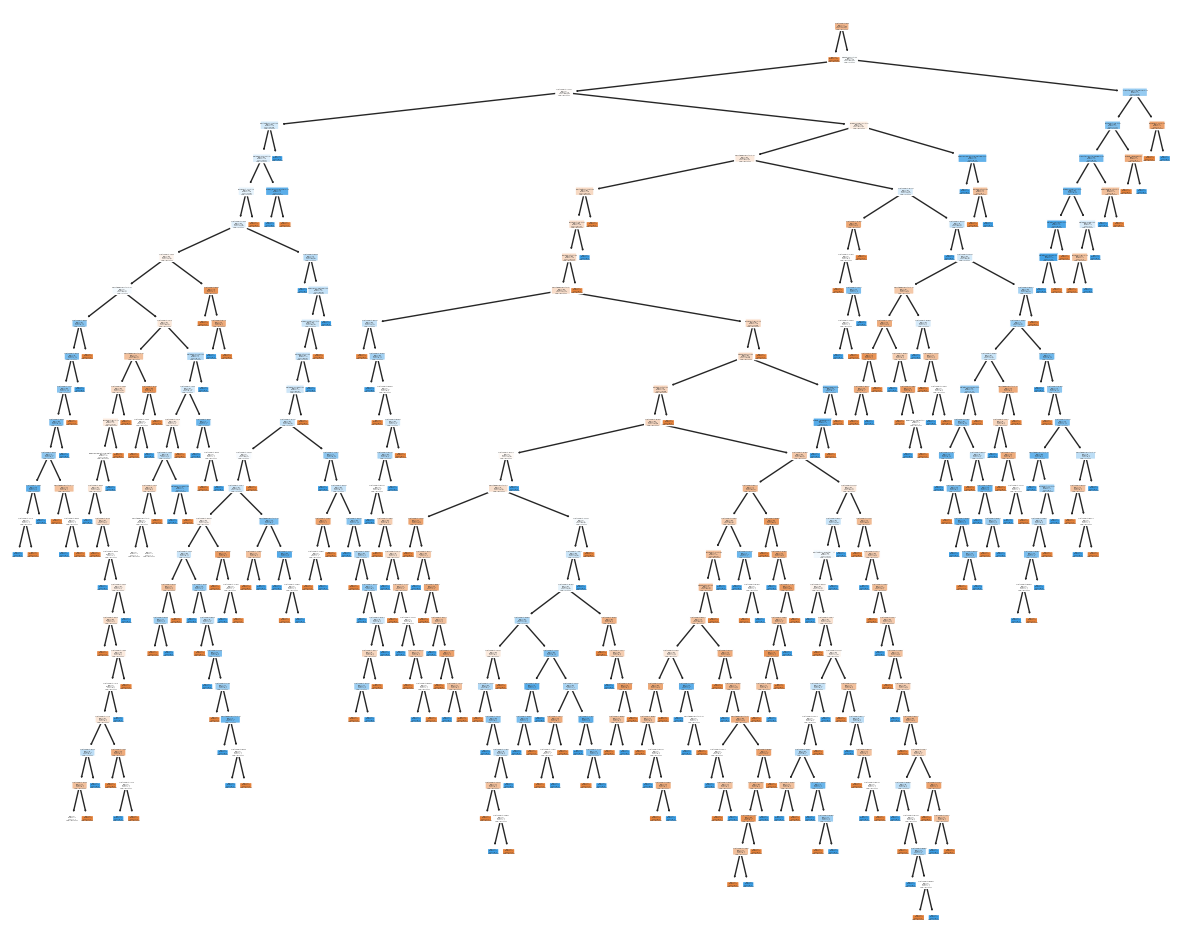

In [124]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Involuntary", "Voluntary"], 
          feature_names=X.columns)

In [125]:
y_pred = clf_dt.predict(X_test)

In [126]:
y_pred

array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0.

In [127]:
y_test

1874    0.0
107     0.0
19      0.0
147     1.0
589     1.0
       ... 
385     0.0
1012    0.0
2316    0.0
2603    0.0
405     0.0
Name: TerminationType, Length: 273, dtype: float64

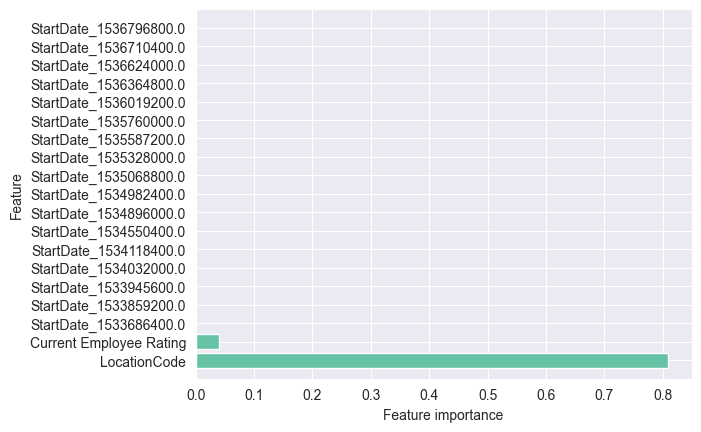

In [128]:
def plot_feature_importances_(model):
    tmp = X.iloc[:, :19]
    n_features = tmp.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_[:19], align='center')
    plt.yticks(np.arange(n_features), X.columns[:19])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(clf_dt)

In [129]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6813186813186813

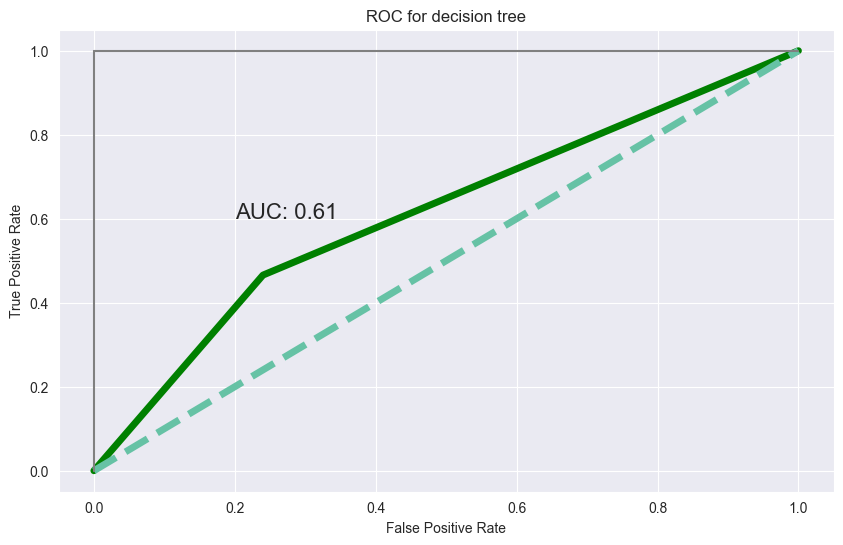

In [130]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [131]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6128767123287672

[[152  48]
 [ 39  34]]


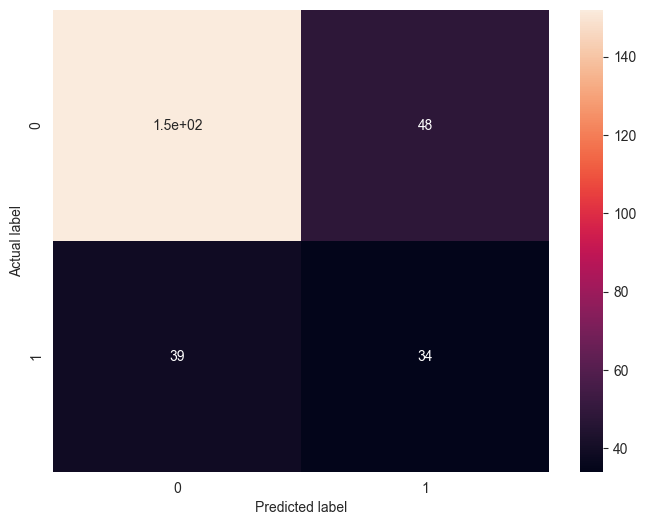

In [132]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       200
         1.0       0.41      0.47      0.44        73

    accuracy                           0.68       273
   macro avg       0.61      0.61      0.61       273
weighted avg       0.69      0.68      0.69       273



<div class="alert alert-block alert-info">

# Decision Tress After Pruning
    
</div>

In [134]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

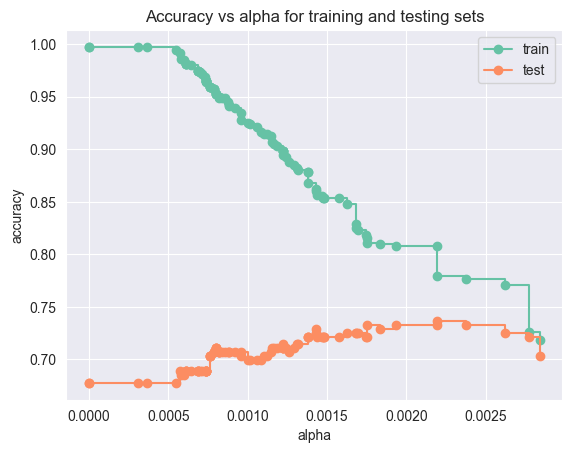

In [135]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

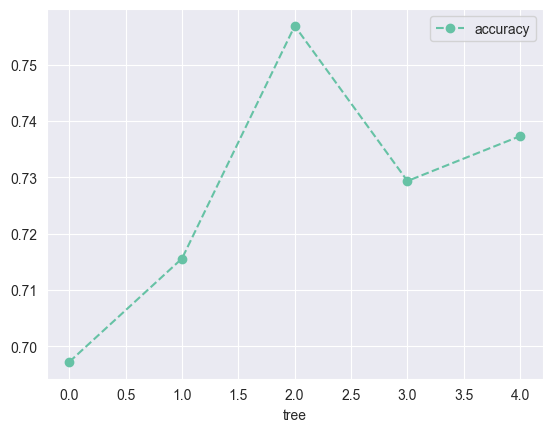

In [136]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0001)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

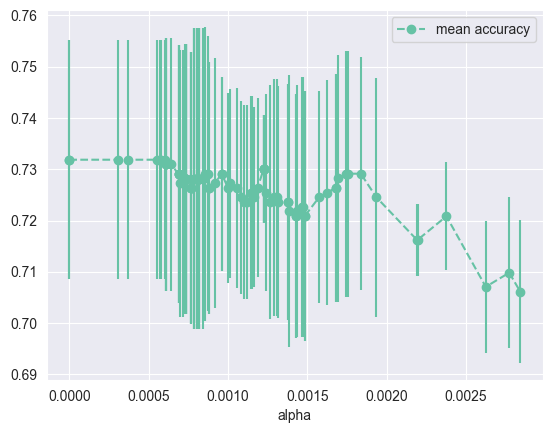

In [137]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 5-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [138]:
alpha_results['mean accuracy'].max()

0.73186065192576

In [139]:
alpha_results['mean accuracy'].idxmax()

0

In [140]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.0

In [141]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.7154542030340815, 0.9821428571428571, 'LocationCode <= 506.5\ngini = 0.411\nsamples = 1089\nvalue = [774, 315]\nclass = Involuntary'),
 Text(0.7088041614713217, 0.9464285714285714, 'gini = 0.0\nsamples = 467\nvalue = [467, 0]\nclass = Involuntary'),
 Text(0.7221042445968412, 0.9464285714285714, 'PayZone_Zone A <= 0.5\ngini = 0.5\nsamples = 622\nvalue = [307, 315]\nclass = Voluntary'),
 Text(0.47662744181213634, 0.9107142857142857, 'LocationCode <= 21428.0\ngini = 0.5\nsamples = 575\nvalue = [292, 283]\nclass = Involuntary'),
 Text(0.2231920199501247, 0.875, 'DepartmentType_IT/IS <= 0.5\ngini = 0.492\nsamples = 178\nvalue = [78, 100]\nclass = Voluntary'),
 Text(0.21654197838736491, 0.8392857142857143, 'MaritalDesc_Divorced <= 0.5\ngini = 0.496\nsamples = 172\nvalue = [78, 94]\nclass = Voluntary'),
 Text(0.20324189526184538, 0.8035714285714286, 'BusinessUnit_TNS <= 0.5\ngini = 0.498\nsamples = 165\nvalue = [77, 88]\nclass = Voluntary'),
 Text(0.1965918536990856, 0.767857142857142

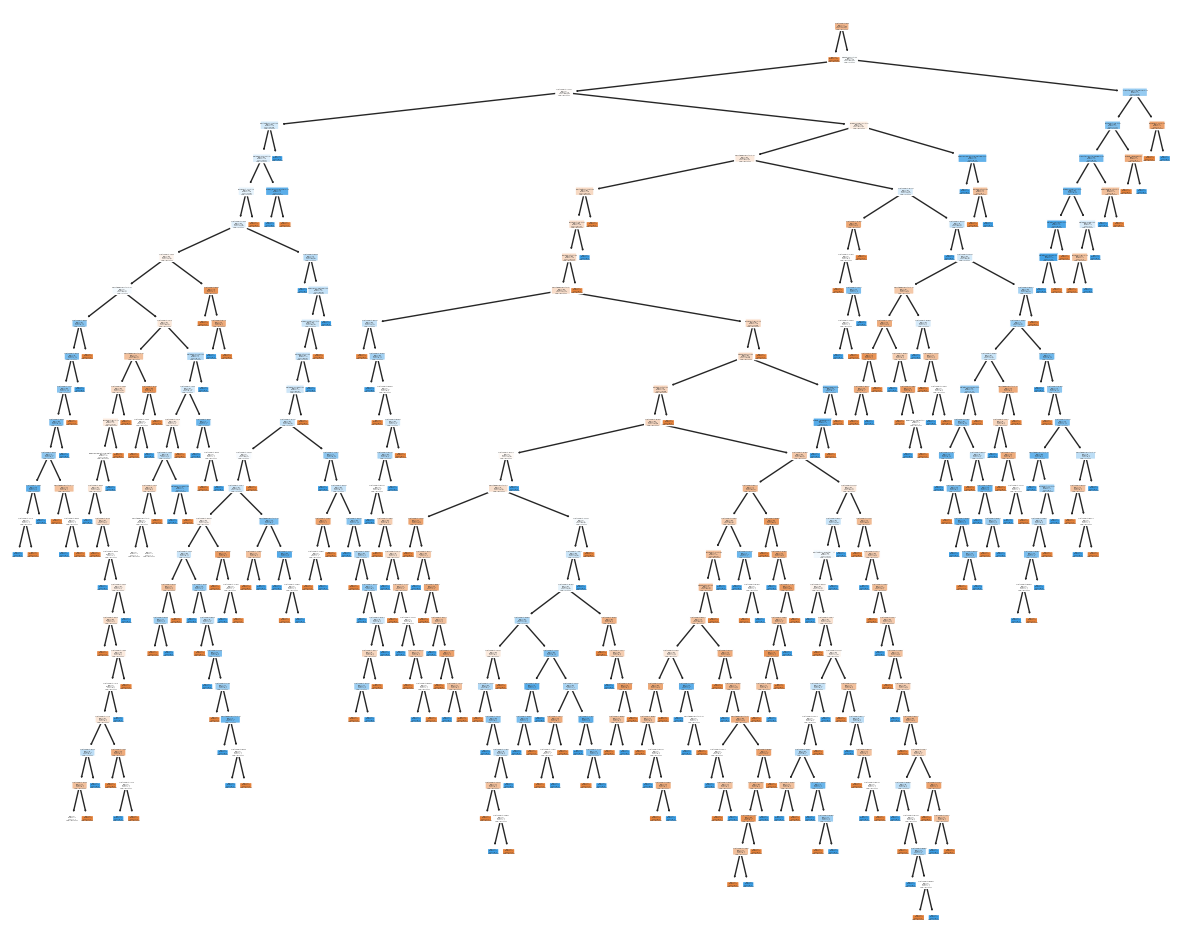

In [142]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Involuntary", "Voluntary"], 
          feature_names=X.columns)

In [143]:
y_pred = clf_dt.predict(X_test)

In [144]:
y_pred

array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0.

In [145]:
y_test

1874    0.0
107     0.0
19      0.0
147     1.0
589     1.0
       ... 
385     0.0
1012    0.0
2316    0.0
2603    0.0
405     0.0
Name: TerminationType, Length: 273, dtype: float64

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6813186813186813

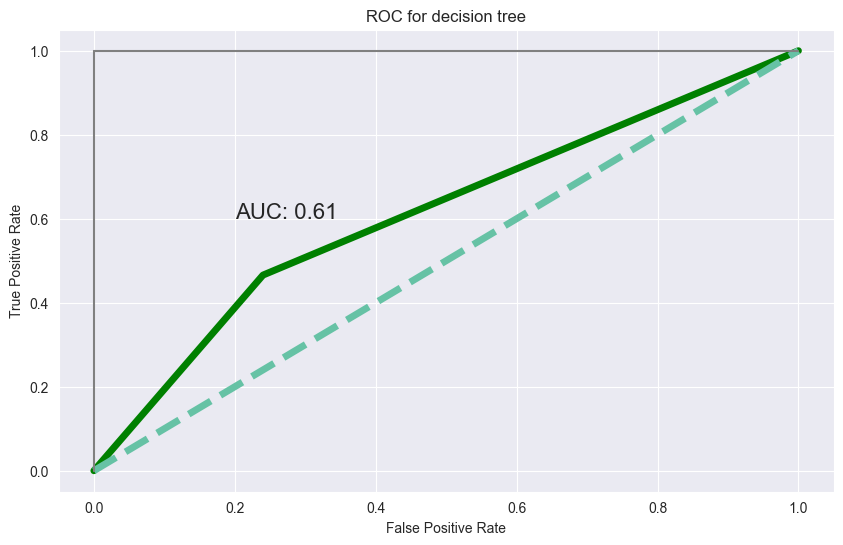

In [147]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [148]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6128767123287672

[[152  48]
 [ 39  34]]


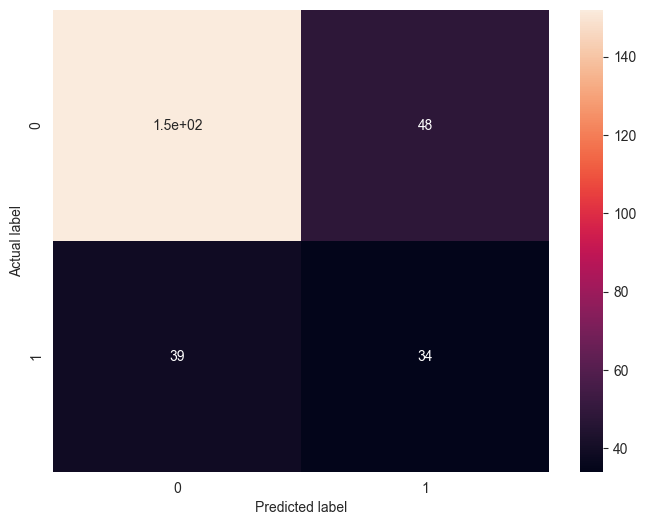

In [149]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       200
         1.0       0.41      0.47      0.44        73

    accuracy                           0.68       273
   macro avg       0.61      0.61      0.61       273
weighted avg       0.69      0.68      0.69       273



<div class="alert alert-block alert-info">

# Random Forest Classifier
    
</div>

In [151]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=10000) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000)

In [152]:
y_pred = clf_rf.predict(X_test)

In [153]:
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [154]:
y_test

1874    0.0
107     0.0
19      0.0
147     1.0
589     1.0
       ... 
385     0.0
1012    0.0
2316    0.0
2603    0.0
405     0.0
Name: TerminationType, Length: 273, dtype: float64

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6996336996336996

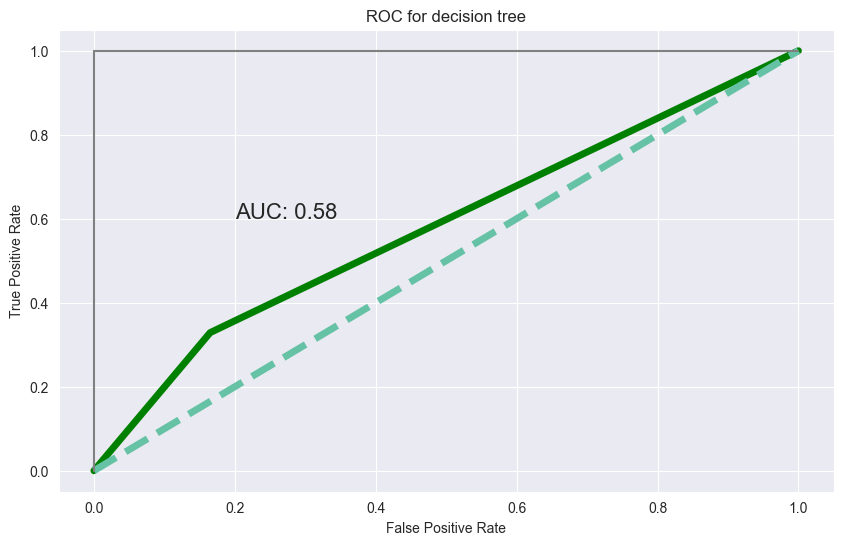

In [156]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [157]:
roc_auc_score(y_test, y_pred)

0.5818835616438356

[[167  33]
 [ 49  24]]


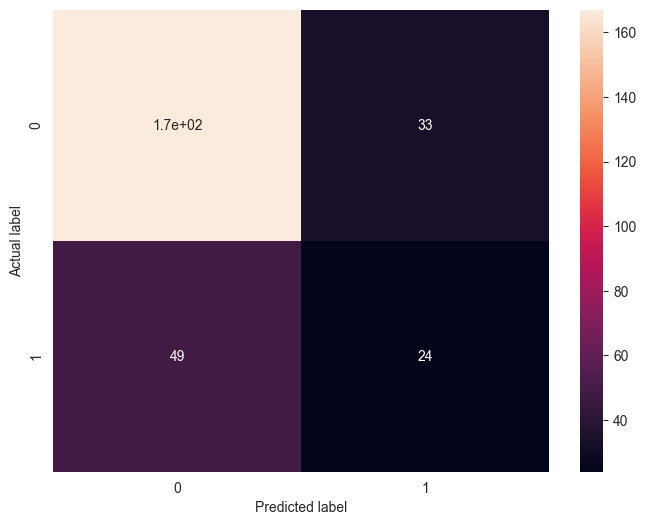

In [158]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       200
         1.0       0.42      0.33      0.37        73

    accuracy                           0.70       273
   macro avg       0.60      0.58      0.59       273
weighted avg       0.68      0.70      0.69       273

